**Example 1: Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm #Linear Regression
from matplotlib import pyplot as plt
from scipy import stats #Statistical Analysis
from sklearn.datasets import fetch_openml #Contains Boston Dataset


**Example 2**

In [2]:
boston = fetch_openml(data_id=531, parser='auto')
data = boston.data
target_variable = boston.target
feature_names = boston.feature_names

In [3]:
df = pd.DataFrame(data,columns=feature_names)
df['medv'] = target_variable
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
x = df.LSTAT.values
y = df.medv.values


x = sm.add_constant(x)

lm_model = sm.OLS(y, x)
lm_fit = lm_model.fit()
print(lm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           5.08e-88
Time:                        17:56:52   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [5]:
names = dir(lm_fit)
print(names)


['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abat_diagonal', '_cache', '_data_attr', '_data_in_cache', '_get_robustcov_results', '_is_nested', '_use_t', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'diagn', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'info_criteria', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_mo

In [6]:
df1 = pd.DataFrame(lm_fit.conf_int(), columns = ['Column_A','Column_B'])
df1

,Column_A,Column_B
0,33.448457,35.659225
1,-1.026148,-0.873951


In [7]:
prediction=pd.DataFrame(lm_fit.predict())
prediction

,0
0,29.822595
1,25.870390
2,30.725142
3,31.760696
4,29.490078
...,...
501,25.366864
502,25.927393
503,29.195563
504,28.397521


In [8]:
residual = pd.DataFrame(lm_fit.resid)
residual

,0
0,-5.822595
1,-4.270390
2,3.974858
3,1.639304
4,6.709922
...,...
501,-2.966864
502,-5.327393
503,-5.295563
504,-6.397521


In [9]:
y_pred = lm_fit.predict(x)
mse = np.mean((y - y_pred) ** 2)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 38.48296722989414
Root Mean Squared Error: 6.203464131426419


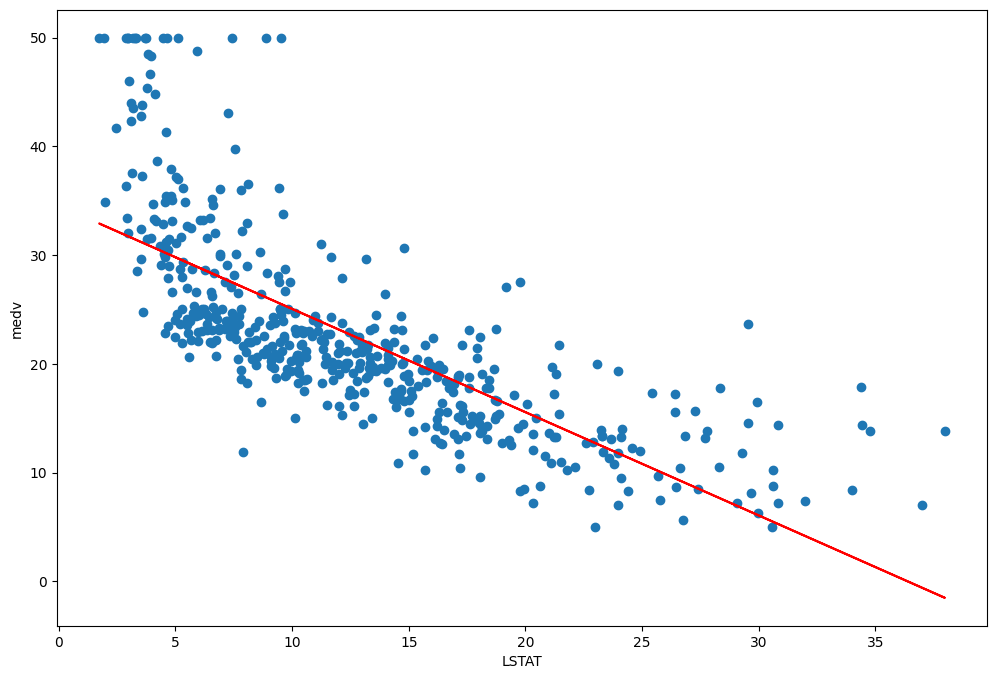

In [10]:
fig, axis = plt.subplots(figsize=(12,8))

axis.scatter(df['LSTAT'], df['medv'], label="data")
# axis.scatter(df['LSTAT'], df['medv'], color='g', marker='+', s=100)
axis.plot(df['LSTAT'], lm_fit.fittedvalues, 'r', label="OLS")

plt.xlabel('LSTAT')
plt.ylabel('medv')
plt.show()


In [11]:
LSTAT_testvalue = 9.14
medv_predicted = lm_fit.predict([2, LSTAT_testvalue])

print(medv_predicted)

[60.42423067]


**Example 3**

In [12]:
x = sm.add_constant(df[['LSTAT','AGE']])

In [13]:
multi_lm_model = sm.OLS(y, x)
multi_lm_fit = multi_lm_model.fit()
print(multi_lm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           2.98e-88
Time:                        17:56:53   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.0

In [14]:
print('Model parameters:\n', multi_lm_fit.params[:])

Model parameters:
 const    33.222761
LSTAT    -1.032069
AGE       0.034544
dtype: float64


Text(0.5, 0, 'MEDV')

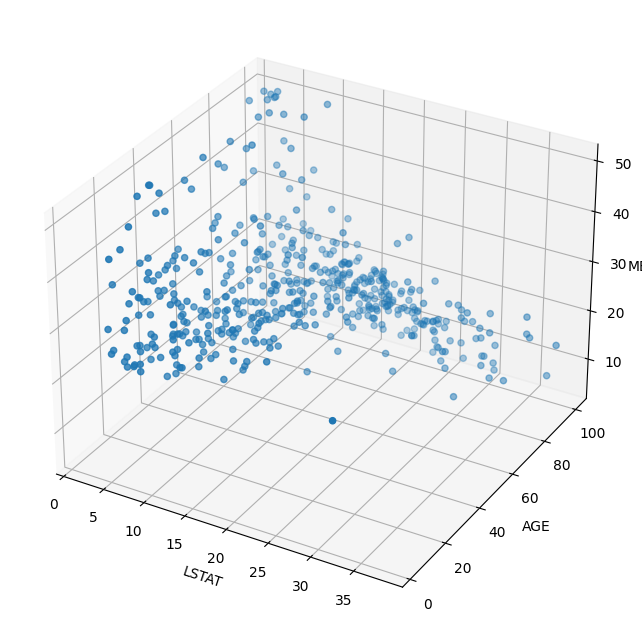

In [15]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['LSTAT'], df['AGE'], df['medv'])
ax.set_xlabel('LSTAT');
ax.set_ylabel('AGE')
ax.set_zlabel('MEDV')

**Example 4**

In [16]:
import statsmodels.formula.api as smf


In [17]:
x = sm.add_constant(df['LSTAT']*df['AGE'])
int_lm_model = smf.ols(formula='medv ~ LSTAT*AGE', data=df)
int_lm_fit = int_lm_model.fit()
print(int_lm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           4.86e-88
Time:                        17:56:53   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

In [18]:
print('Model parameters:\n', int_lm_fit.params[:])

Model parameters:
 Intercept    36.088536
LSTAT        -1.392117
AGE          -0.000721
LSTAT:AGE     0.004156
dtype: float64


**Example 5**

In [19]:
nonlin_model = smf.ols('medv ~ LSTAT + I(LSTAT**2)', data=df)
nonlin_fit = nonlin_model.fit()
print(nonlin_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Wed, 28 Jun 2023   Prob (F-statistic):          1.56e-112
Time:                        17:56:53   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

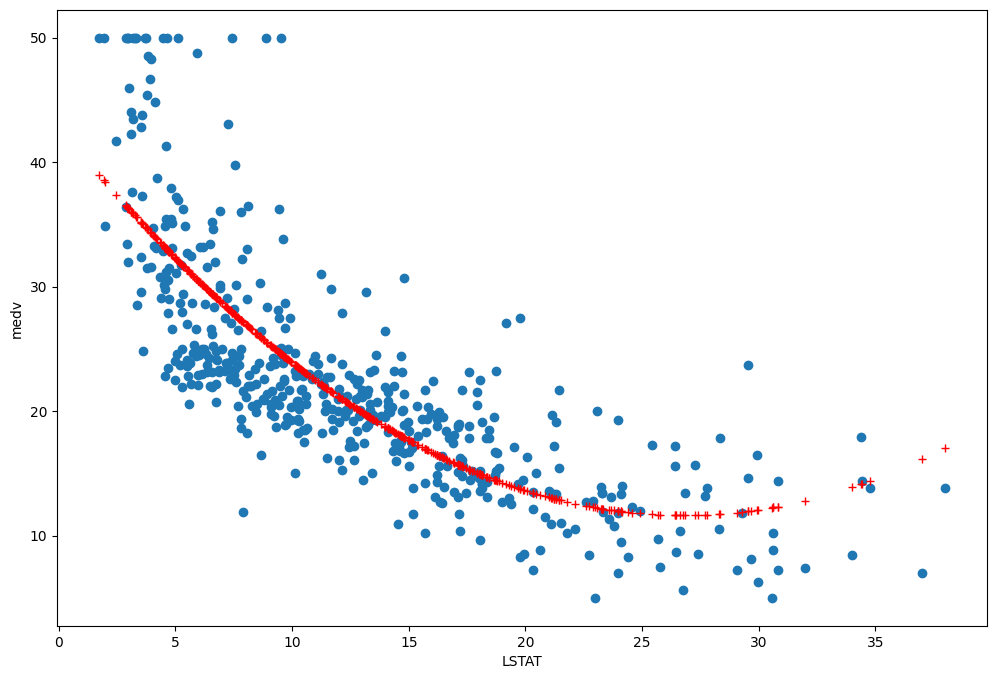

In [20]:
fig, axis = plt.subplots(figsize=(12,8))

axis.scatter(df['LSTAT'], df['medv'], label="data")
axis.plot(df['LSTAT'], nonlin_fit.fittedvalues, 'r', marker='+', linestyle = 'none', label="OLS")

plt.xlabel('LSTAT')
plt.ylabel('medv')
plt.show()

In [21]:
print('Model parameters:\n', nonlin_fit.params[:])

Model parameters:
 Intercept        42.862007
LSTAT            -2.332821
I(LSTAT ** 2)     0.043547
dtype: float64


In [22]:
from statsmodels.stats.api import anova_lm
anova = anova_lm(lm_fit, nonlin_fit)
print(anova)

   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28
